In [101]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import seaborn as sns
import tensorflow as tf

In [102]:
# Necessary libraries 
import pandas as pd 
import seaborn as sns
import pandas as pd
import numpy as np

In [103]:
# Reading the data
# df  = pd.read_excel("all_sentiments.csv", sheet_name="Table1") 

In [104]:
df1 = pd.read_excel('Comments - edited (modified2) 2.xlsx')

In [105]:
df1.columns

Index(['Comment', 'Sentiment', 'Percentage', 'Topic'], dtype='object')

In [110]:
df1.head()

Comment Sentiment Percentage  \
0  vallah bir ay deyil çəkdiyimiz, 30 dəfə usta g...  Negative          6   
1  siz nətər insansız neyse 160 manat burnunuzdan...  Negative          8   
2       hardadi i indi bele saf uwaqlar ve dermanlar  Negative          4   
3  biz bu gün asif məhərrəmov filialından pendir ...  Negative          5   
4                                         maraqlidir  Positive          6   

                Topic  
0       Shark Telecom  
1       Shark Telecom  
2       Shark Telecom  
3  Neptun Supermarket  
4     Borani Restoran

In [111]:
df1.shape

(44361, 4)

In [112]:
df2 = pd.read_excel('exported_with_predictions.xlsx')

In [113]:
df2.head()

Unnamed: 0 Comment_prev Comment predicted
0           0         Ozu.     özü   Neutral
1           1         Eve.     evə   Neutral
2           2         Esx.     eşq   Neutral
3           3         Ela.     əla  Positive
4           4         Men.     mən   Neutral

In [114]:
df2.columns

Index(['Unnamed: 0', 'Comment_prev', 'Comment', 'predicted'], dtype='object')

In [115]:
df2.columns = ['Index', 'Comment_prev', 'Comment', 'Sentiment']

In [116]:
df2.head()

Index Comment_prev Comment Sentiment
0      0         Ozu.     özü   Neutral
1      1         Eve.     evə   Neutral
2      2         Esx.     eşq   Neutral
3      3         Ela.     əla  Positive
4      4         Men.     mən   Neutral

In [117]:
df2.shape

(19950, 4)

In [118]:
# Reading the data from google drive, this is for working with google colab
# import os
# from google.colab import drive
# drive.mount("/content/drive/")
# os.chdir('/content/drive/My Drive/')
#df_bank = pd.read_excel("Comments_all_bank.xlsx")

In [119]:
#df_bank.head()

In [120]:
#df_bank.shape

In [121]:
# Randomly delete 80% of the neutral rows
#df_bank = df_bank.drop(delete_rows)


In [122]:
#df_bank.shape

In [123]:
df = pd.concat([df1[["Comment", "Sentiment"]], df2[["Comment", "Sentiment"]]], ignore_index=True)

In [124]:
#df.columns = ["Comment", "Sentiment"]

In [125]:
df.head()

Comment Sentiment
0  vallah bir ay deyil çəkdiyimiz, 30 dəfə usta g...  Negative
1  siz nətər insansız neyse 160 manat burnunuzdan...  Negative
2       hardadi i indi bele saf uwaqlar ve dermanlar  Negative
3  biz bu gün asif məhərrəmov filialından pendir ...  Negative
4                                         maraqlidir  Positive

In [126]:
df.shape

(64311, 2)

In [127]:
# Working with only relevant columns
df = df[["Comment", "Sentiment"]]

In [128]:
df.head()

Comment Sentiment
0  vallah bir ay deyil çəkdiyimiz, 30 dəfə usta g...  Negative
1  siz nətər insansız neyse 160 manat burnunuzdan...  Negative
2       hardadi i indi bele saf uwaqlar ve dermanlar  Negative
3  biz bu gün asif məhərrəmov filialından pendir ...  Negative
4                                         maraqlidir  Positive

In [129]:
df.shape

(64311, 2)

In [130]:
# Do we have NA in data?
df.isna().sum()

Comment         55
Sentiment    18989
dtype: int64

In [131]:
# Deleting the rows that have NA
df.dropna(inplace=True)

In [132]:
# resetting index
df.reset_index(drop=True, inplace=True)

In [133]:
df.shape # We have 13522 labeled sentences

(45270, 2)

In [134]:
df.head()

Comment Sentiment
0  vallah bir ay deyil çəkdiyimiz, 30 dəfə usta g...  Negative
1  siz nətər insansız neyse 160 manat burnunuzdan...  Negative
2       hardadi i indi bele saf uwaqlar ve dermanlar  Negative
3  biz bu gün asif məhərrəmov filialından pendir ...  Negative
4                                         maraqlidir  Positive

<Axes: xlabel='Sentiment', ylabel='count'>

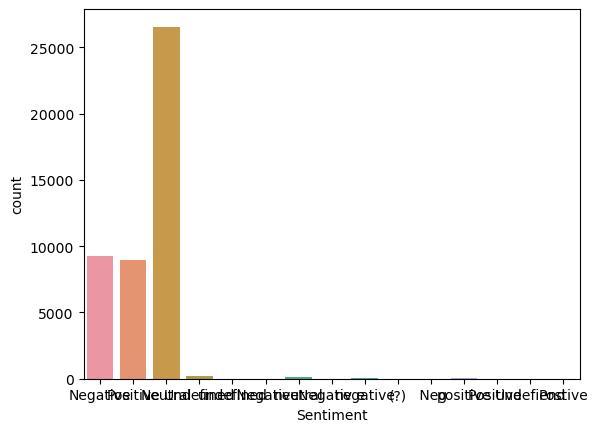

In [135]:
# It seems you made a mistake while labeling 
sns.countplot(x = "Sentiment", data = df)

In [136]:
df["Sentiment"].value_counts()

Neutral      26565
Negative      9240
Positive      8989
Undefined      227
neutral        154
negative        54
positive        23
Positive         5
Postive          4
 Negative        3
(?)              2
undefined        1
Negativ e        1
 Neg             1
Undefiend        1
Name: Sentiment, dtype: int64

In [137]:
df["Sentiment"].unique()

array(['Negative', 'Positive', 'Neutral', 'Undefined', 'undefined',
       ' Negative', 'neutral', 'Negativ e', 'negative', '(?)', ' Neg',
       'positive', 'Positive ', 'Undefiend', 'Postive'], dtype=object)

In [138]:
# Deleting the rows that their sentiment column is --> Undefined, (?),  Undefiend, undefined
df.loc[df['Sentiment'].isin(['Undefined', '(?)', 'Undefiend', 'undefined'])]
# Totally 301 rows

Comment  Sentiment
130                           сен онларын чавабыны козле  Undefined
140    @seqlb bəs rusiyaya bu qədər lənət deyirsənsə ...  Undefined
144                                        bunkerdən çıx  Undefined
164    @nigarturan169 hede gerey sosiska yeyesiz gedi...  Undefined
241                        yaziğin dili çixdi işlemekdem  Undefined
...                                                  ...        ...
12834  şənbə e-moizəsini başladı virtual sufi:- özünü...  Undefined
12835                                    necə istəyirsən  Undefined
12852  şəbiynən mesajlarımızı görsəz elə bil 2 sevgil...  Undefined
12862                               harda çox sayda hüq…  Undefined
20013                                                (t)  Undefined

[231 rows x 2 columns]

In [139]:
# Taking their indexes to delete
must_delete = df.loc[df['Sentiment'].isin(['Undefined', '(?)', 'Undefiend', 'undefined', 'ne', 'neh'])].index

In [140]:
df.drop(must_delete, inplace=True)

In [141]:
df.shape # Deleted 301 rows

(45039, 2)

In [142]:
df.reset_index(inplace=True, drop="True")

In [143]:
df.head()

Comment Sentiment
0  vallah bir ay deyil çəkdiyimiz, 30 dəfə usta g...  Negative
1  siz nətər insansız neyse 160 manat burnunuzdan...  Negative
2       hardadi i indi bele saf uwaqlar ve dermanlar  Negative
3  biz bu gün asif məhərrəmov filialından pendir ...  Negative
4                                         maraqlidir  Positive

In [144]:
df["Sentiment"].value_counts()

Neutral      26565
Negative      9240
Positive      8989
neutral        154
negative        54
positive        23
Positive         5
Postive          4
 Negative        3
Negativ e        1
 Neg             1
Name: Sentiment, dtype: int64

In [145]:
df["Sentiment"].unique()

array(['Negative', 'Positive', 'Neutral', ' Negative', 'neutral',
       'Negativ e', 'negative', ' Neg', 'positive', 'Positive ',
       'Postive'], dtype=object)

In [146]:
# Changing negative, Neg, Negativ e to Negative
df.loc[df['Sentiment'].isin(['Negativ e', ' Negative', 'negative', ' Neg'])]

Comment  Sentiment
590                                                    😥   Negative
2825                    gözlərivi yox gözlərini olmalidi  Negativ e
2962             simnar xanın allah cəsasını versin🤬😠😡😤😈   negative
2984   bacarırlar belə kinolar çəksinlər ey neçə illə...   negative
3013               insanin hovselesi catmir qulaq asmaga   negative
3016                       bir sözü 50 defe deme ne olar   negative
3017                     men etim unu ölçusunu sef deyir   negative
3064   her shey yaxshidi ,amma chox danishmaq 0 !!! y...   negative
3065                                  ses adami bezdirir   negative
3107   ağzını çox marcildadir hövsələm çatmadı baxmağ...   negative
3161                                              😭😭🥺🥺🥺🥲   negative
3170                                               eşşey   negative
3175   aheng qanunu tamamile sehv başa saldız dexli y...   negative
3201   e,ə,o,ö), qapalı sait hərflərin isə üstü açıq ...   negative
3202                                        məs: ı,i,u,ü   negative
3204                            çox yorucu, uzun danışır   negative
3224   amma orfoepiya normalarından danışıb, özünüz b...   negative
3242                                   pis, yaxshi deyil   negative
3253                                           bu yalnış   negative
3270                                     hech beyenmedim   negative
4980   gündən günə dəyişir həyat birdən birə yerə düş...        Neg
5596   olen adama sevinmezler ama yaxwiki imran oldu ...   negative
12169                boyu 155 olduğu üçün çətinlik çəkir   Negative
13047  gözlə dəyər verdiyim insanların xətrinə dəyim ...   negative
13089                             arvadı trampdan küsüb?   negative
13101  bilirəm, gedənlə ölünməz amma qalanlarla da ya...   negative
13104  i̇nstada nə qədər mənasız səhifə varsa məni ta...   negative
13105                   ucarda iki uşaq atası özünü asdı   negative
13106           kimyaçılar gələcək nəsilə pis örnək olub   negative
13107                            qəşəng siqaret çəkirsən   negative
13141  azerbaycan'da qabağa getmeyin yolları :1) pulu...   negative
13145                             millət şəhəri yandirir   negative
13149               adama dəli cəsarəti lazımdı hərdən))   negative
13185                                    )- ay mən sənin   negative
13188  bakı deyəndə ilk ağla gələn dəli küləyi ikinci...   negative
13189                              ömrümü yediiiiiiz lan   negative
13194                                        pes diyorum   negative
13195  asqırmaq istəyib asqıra bilmirsən ha, bax o dü...   negative
13199  əli kərimli: ətraf ölkələrin heç birində müxal...   negative
13200                   abş-da atışma olub, 5 nəfər ölüb   negative
13204  dişimdəki assimetriklik məni saniyəbəsaniyə na...   negative
13207  navalnı moskvada keçirilən etiraz aksiyasında ...   negative
13252     dilə gəlməyən hüzn yüklənər qəlbə və qırar onu   negative
13257  bizimkilərin əvəz olunmaz xarakteridi də insan...   negative
13291                           aykut yenə özünü buraxıb   negative
13300  hasan ali öz yerində oynaya bilmir, soxub orta...   negative
13301                                    dəli olacaaammm   negative
13302                                    bu reallıqdır 😑   negative
13304  aykut kocaman valbuenayı aziz yıldırım ali koç...   negative
13309  allah belasını  qalıb ali koçlu,ersunlu,alexli...   negative
13310                              biri aykuta soxsun da   negative
13311  qaqaş padxodda master edib di gəl ki, deyir  p...   negative
20803  seni çeynemeden uda bilen birini,dişlemeye çal...   negative
21699                                    uber kim köpek?   negative
22100  mehlede qadinlar dedi esitdim, men sensiz cox ...   negative
22500                            xorvatların da yox imiş   negative
22501                                  ağlıya-ağlıya -_-   negative
23624                                   10 il e,ilahi :d   negative
23994                          amma s

In [147]:
df["Sentiment"] = df["Sentiment"].replace(['Negativ e', ' Negative', 'negative', ' Neg'], "Negative")

In [148]:
df["Sentiment"].value_counts()

Neutral      26565
Negative      9299
Positive      8989
neutral        154
positive        23
Positive         5
Postive          4
Name: Sentiment, dtype: int64

In [149]:
df["Sentiment"].unique()

array(['Negative', 'Positive', 'Neutral', 'neutral', 'positive',
       'Positive ', 'Postive'], dtype=object)

In [150]:
df["Sentiment"] = df["Sentiment"].replace(['neutral', ' Neutral', 'Neutal'], 'Neutral')

In [151]:
df["Sentiment"].value_counts()

Neutral      26719
Negative      9299
Positive      8989
positive        23
Positive         5
Postive          4
Name: Sentiment, dtype: int64

In [152]:
df["Sentiment"].unique()

array(['Negative', 'Positive', 'Neutral', 'positive', 'Positive ',
       'Postive'], dtype=object)

In [153]:
df["Sentiment"] = df["Sentiment"].replace(['positive', 'Positive ', 'Postive'], 'Positive')

In [154]:
df["Sentiment"].value_counts() # Now you have 3 sentiments

Neutral     26719
Negative     9299
Positive     9021
Name: Sentiment, dtype: int64

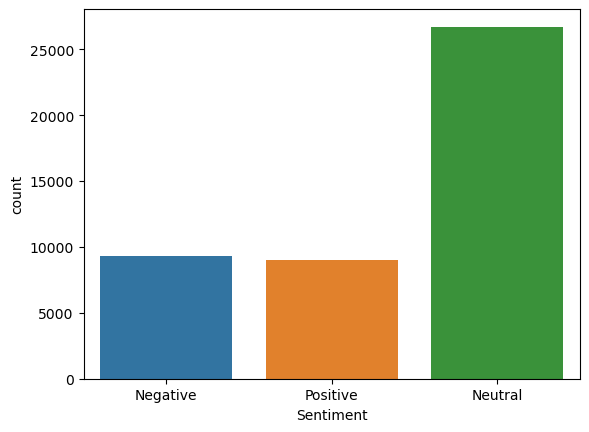

In [155]:
sns.countplot(x = "Sentiment", data = df); # General distribution

In [156]:
df.reset_index(inplace=True, drop=True)

In [157]:
# Split data into sentences and labels
sentences = df['Comment'].values
labels = df['Sentiment'].values.reshape(-1, 1)

In [158]:
from sklearn import preprocessing

In [159]:
enc = preprocessing.OneHotEncoder()
enc.fit(labels)



OneHotEncoder()

In [160]:
y = enc.transform(labels).todense()

In [161]:
# Split data into train and test sets
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.15, random_state=123)

sentences_train = sentences_train.astype(str)
sentences_test = sentences_test.astype(str)

In [162]:
# Create the CountVectorizer object
vectorizer = TfidfVectorizer(analyzer = "char_wb", ngram_range = (4,4))

In [163]:
# Fit the vectorizer to the training set
vectorizer.fit(sentences_train)
vectorizer.fit(sentences_test)


TfidfVectorizer(analyzer='char_wb', ngram_range=(4, 4))

In [164]:
# Transform the training and testing set into feature vectors
X_train = vectorizer.transform(sentences_train).todense()
X_test = vectorizer.transform(sentences_test).todense()

MemoryError: Unable to allocate 9.06 GiB for an array with shape (38283, 31771) and data type float64

In [ ]:
X_train

In [ ]:
input_dim = X_train.shape[1]
input_dim

In [ ]:
model = tf.keras.models.Sequential([    
    tf.keras.layers.InputLayer(input_shape=(input_dim,)),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [ ]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

In [ ]:
model.summary()

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    batch_size=16,
    verbose=1,
)

In [ ]:

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(accuracy))

In [ ]:
# Evaluate the model on the train set
accuracy = model.evaluate(X_train, y_train)
print('Test Accuracy: {}'.format(accuracy))